# CIVE586 Assignment 4: Ground response analysis-Question1
> Created by: Mingda Lyu     
> Last modified: 21th, Nov, 2024

---

## Question 1: 

Given the soil profile shown in the figure below, (1) calculate the transfer function relating ground surface to the bedrock outcrop [i.e., $𝐹_1(𝑓)$], (2) plot out the amplification factor [i.e., $|𝐹_1(𝑓)|$ vs. 𝑓 for 𝑓 = 0 to 25 Hz], and (3) compute the time history of acceleration at the surface of the linear elastic soil deposit shown in the figure below in response to the E-W component of Gilroy Array 1 motion from the Loma Prieta earthquake.


<a href="https://ibb.co/VJj2sYk"><img src="https://i.ibb.co/Qpbr4vx/1.png" alt="1" border="0" /></a>https://ibb.co/VJj2sYk)



### Solution:   

Computation of the ground surface motion from the bedrock motion can be accomplished in the following series of steps:

1. Obtain the time history of acceleration of the input motion. In this case the input motion is the E-W component of the Gilroy Array 1 motion from Loma Prieta earthquake. The raw data is retrieved from the PEER NGA-West2 database. The acceleration data is shown below. This record consists of 7998 acceleration values at 0.005-sec intervals.

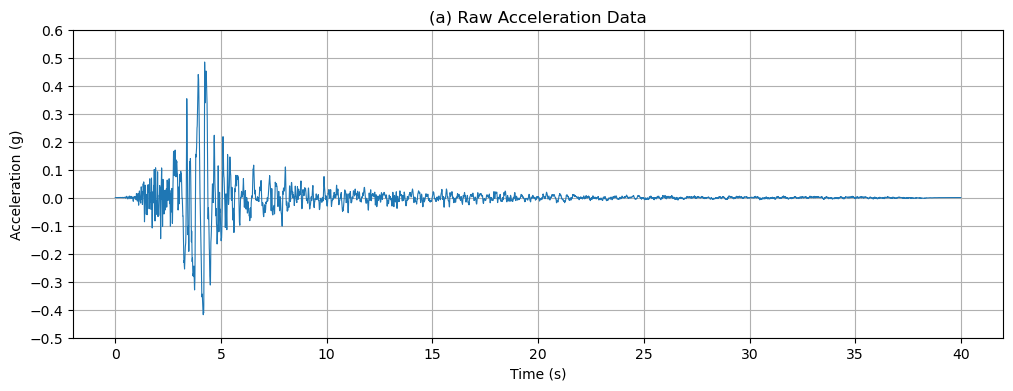

In [9]:
# Package import
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Acceleration raw data import
def read_file_to_array(file_path, header_lines=4, sampling_rate=0.005):
    """
    Args:
        file_path (str): Path to the file.
        header_lines (int): Number of header lines to skip at the start of the file.

    Returns:
        np.ndarray: A NumPy array containing the numeric data from the file.
    """
    data = []

    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        # Skip the header lines and process the data section
        for line in lines[header_lines:]:
            values = line.split()
            try:
                data.extend(map(float, line.split()))
            except ValueError:
                continue

        # Convert the data list to a NumPy array and add the time column
        data = np.array(data)
        row_indices = np.arange(data.shape[0])+1  
        time_col = np.round(row_indices * sampling_rate, decimals=3)   
        # Combine the new column with the original array
        data = np.column_stack((time_col, data))
    return np.array(data)

# Data import
file_path = "RSN765_LOMAP_G01090.AT2"
data_array = read_file_to_array(file_path)

# Plot acceleration time series
plt.figure(figsize=(12,4))
plt.plot(data_array[:,0], data_array[:,1], linewidth=0.8)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (g)")
plt.title('(a) Raw Acceleration Data')
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(0.1)) 
plt.ylim(-0.5, 0.6)
plt.grid()
plt.show()

2. Compute the Fourier series of the bedrock (input) motion. The Fourier series is complex valued; its one-sided Fourier amplitude spectrum is shown below.

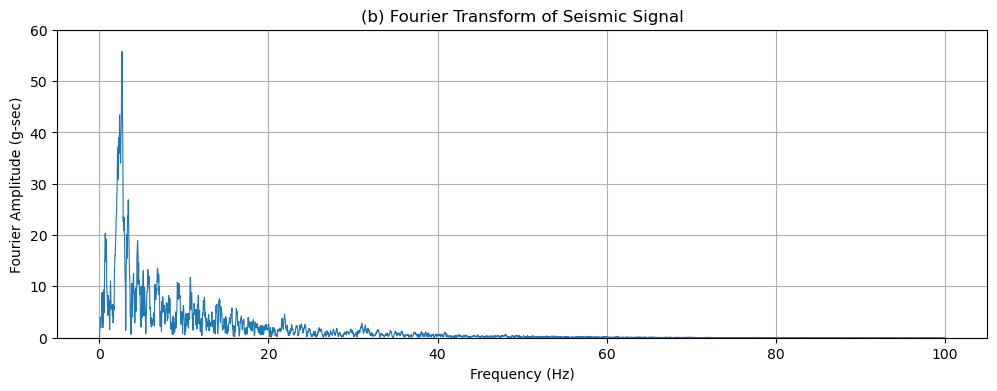

In [10]:
# Fouriour transform to the raw data

# Extract time and acceleration
time = data_array[:, 0]  # First column: time
acceleration = data_array[:, 1]  # Second column: acceleration

# Calculate the sampling frequency
dt = time[1] - time[0]  # Time interval (assumes uniform sampling)
fs = 1 / dt  # Sampling frequency

# Perform Fourier Transform
fft_result = np.fft.fft(acceleration)  # FFT of the acceleration signal
frequencies = np.fft.fftfreq(len(acceleration), d=dt)  # Frequency bins

# Take the magnitude of the FFT result and consider only positive frequencies
magnitude = np.abs(fft_result)
positive_frequencies = frequencies[frequencies >= 0]
positive_magnitude = magnitude[frequencies >= 0]

# Plot the original signal
plt.figure(figsize=(12, 4))
plt.plot(positive_frequencies, positive_magnitude, linewidth=0.8)
plt.title("(b) Fourier Transform of Seismic Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Fourier Amplitude (g-sec)")
plt.ylim(0, 60)
plt.grid()
plt.show()

3. Compute the transfer function that relates the ground surface (output) motion to the bedrock (input) motion. From equation (1), the transfer function has values of 1 below frequencies of about $10 Hz$. However, at frequencies that approach the fundamental frequency of the soil deposit ($f_O = v_s/4H = 26.25 Hz$ and $f_O = 3\times v_s/4H = 78.75 Hz$), the transfer function approximates infinite number. Since most of the energy is at frequency less than $25Hz$, and to avoid numerical calculation error, ignore the enhancement effect on the high frequency part of the data ($>25Hz$).

$$ F_1(\omega) = \frac{u_{\text{max}}(0, t)}{u_{\text{max}}(H, t)} = \frac{2A e^{i\omega t}}{2A \cos(kH)e^{i\omega t}} = \frac{1}{\cos(kH)} = \frac{1}{\cos\left(\frac{\omega H}{v_s}\right)} \tag{1}$$



F1 values (first 10):
[1.        +0.j 1.00000112+0.j 1.00000448+0.j 1.00001008+0.j
 1.00001791+0.j 1.00002799+0.j 1.00004031+0.j 1.00005486+0.j
 1.00007166+0.j 1.00009069+0.j]


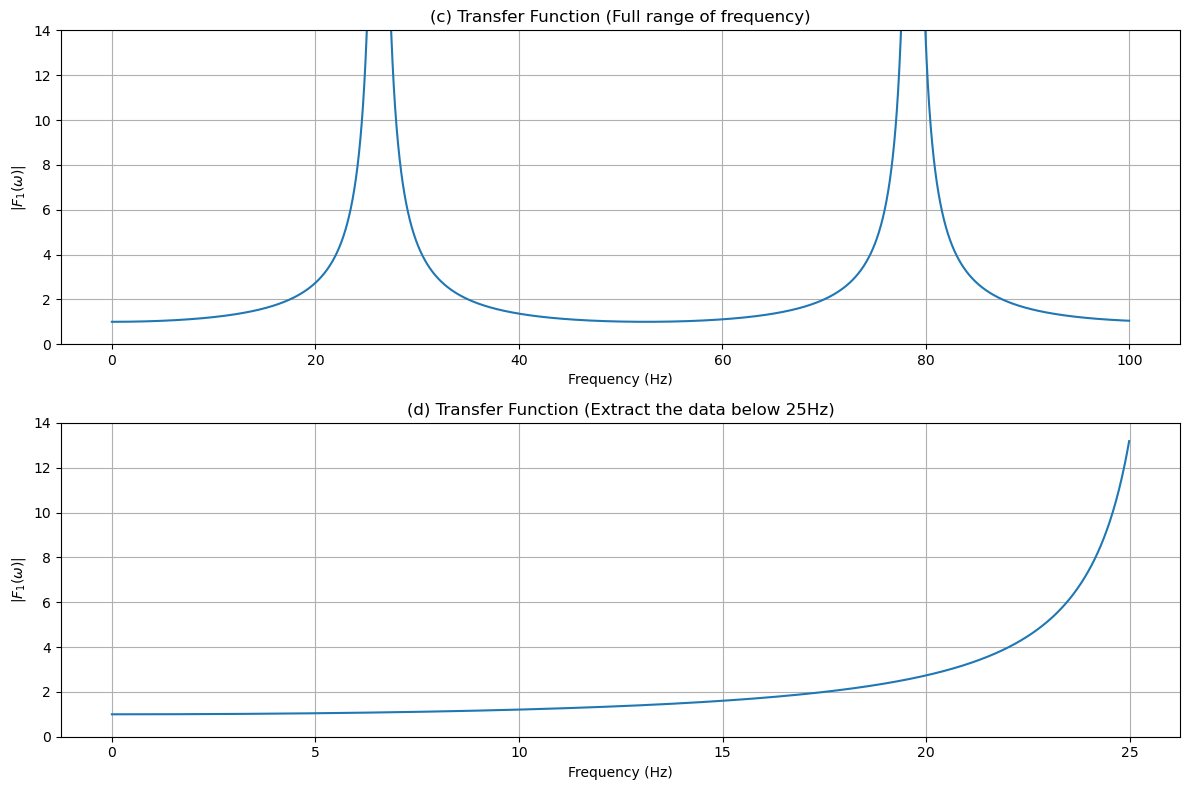

In [11]:
# Amplification factor calculation

# Given constants
H = 10  # Height in feet
Vs = 1050  # Shear wave velocity in ft/s

# Convert frequency to angular frequency (omega) in rad/s
omega_freq = 2 * np.pi * positive_frequencies  # Angular frequency

# Calculate F_1 based on the formula: F_1(omega) = 1 / cos(omega * H / Vs)
F1 = abs(1 / np.cos(omega_freq * H / Vs))

# Print the first few F1 values for verification
F1_comp = F1[:10] * np.exp(1j * 0)
print("F1 values (first 10):")
print(F1_comp)

# Plot F_1 vs Frequency
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(positive_frequencies, F1)
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$|F_1(\omega)|$")
plt.ylim(0, 14)
plt.title(r"(c) Transfer Function (Full range of frequency)")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(positive_frequencies[:1000], F1[:1000])
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$|F_1(\omega)|$")
plt.ylim(0, 14)
plt.title(r"(d) Transfer Function (Extract the data below 25Hz)")
plt.grid()

plt.tight_layout()
plt.show()


4. Compute the Fourier series of the ground surface (output) motion as the product of the transfer function and the Fourier series of the bedrock (input) motion. At frequencies less than 10 Hz, the Fourier spectrum of the ground surface motion is virtually the same as that of the bedrock motion. Although the transfer function indicates that frequencies above 20 Hz or so will be amplified strongly, the input motion is weak in that frequency range. The one-sided amplitude spectrum is shown in the figure below.

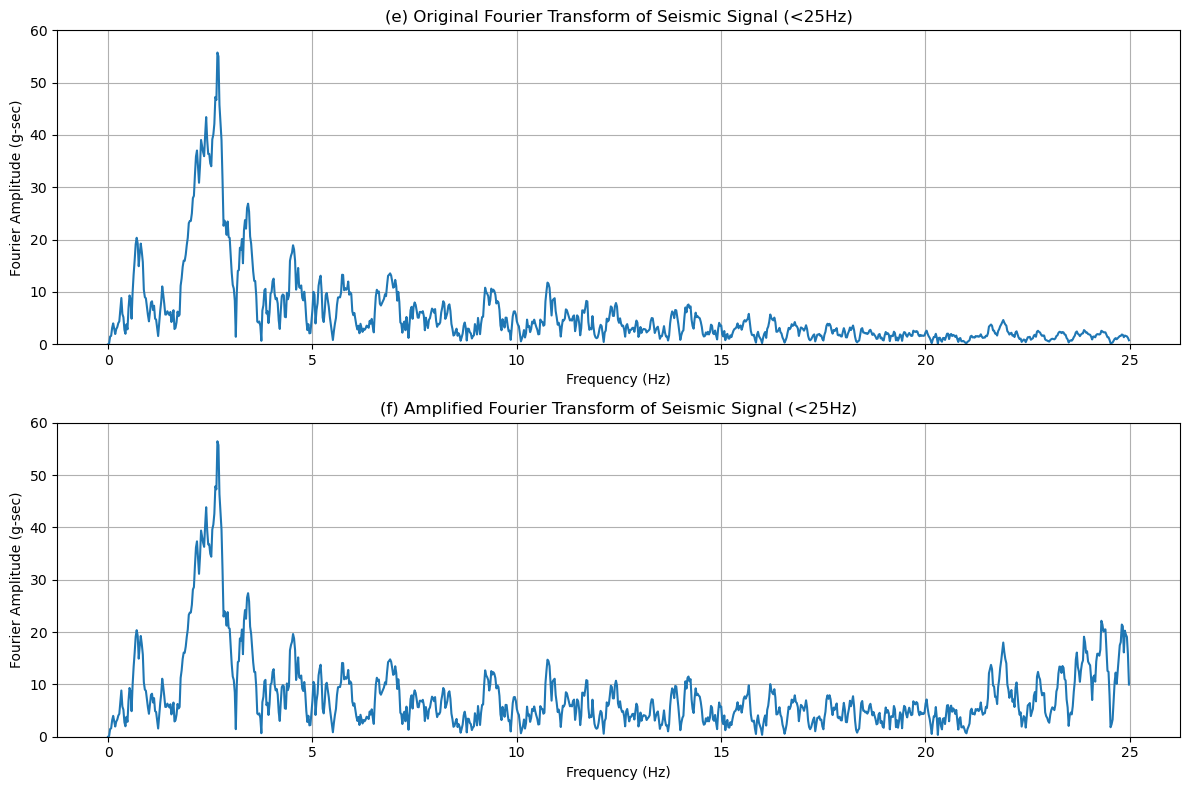

In [12]:
# Amplified fourier series (<25Hz)
amp_mag = positive_magnitude[:1000] * F1[:1000]

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(positive_frequencies[:1000], positive_magnitude[:1000])
plt.title("(e) Original Fourier Transform of Seismic Signal (<25Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Fourier Amplitude (g-sec)")
plt.ylim(0, 60)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(positive_frequencies[:1000], amp_mag)
plt.title("(f) Amplified Fourier Transform of Seismic Signal (<25Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Fourier Amplitude (g-sec)")
plt.ylim(0, 60)
plt.grid()

plt.tight_layout()
plt.show()


5. Obtain the time history of the ground surface motion by inverting its Fourier series. As illustrated in the figure below. The time history of ground surface motion has a somewhat greater content of high-frequency components, but is generally similar to the time history of bedrock motion.

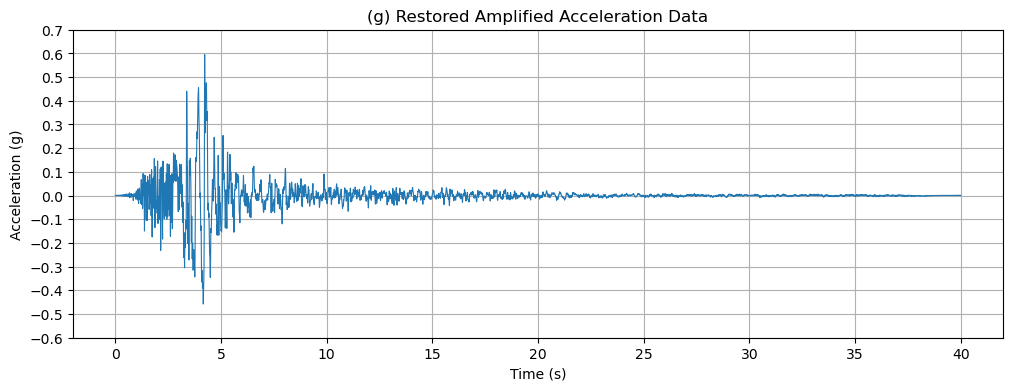

In [13]:
# Invert to the time-domain signal

# Generate the complex spectrum
# Ensure symmetry of spectrum for real time-domain signals
frequencies[frequencies < 0] = 0
omega_freq_all = 2 * np.pi * frequencies  # Angular frequency
F1_all = abs(1 / np.cos(omega_freq_all * H / Vs))
F1_all[1000:] = 1
complex_spectrum = fft_result * F1_all

# Perform Inverse Fourier Transform
time_signal = np.fft.ifft(complex_spectrum).real  # Extract the real part to get the time-domain signal

# Generate the time array
N = len(complex_spectrum)  # Total number of points
sampling_rate = positive_frequencies[-1]*2  # Assume Nyquist frequency at the max frequency
time = np.linspace(0, N / sampling_rate, N, endpoint=False)  # Time array

# Plot the results
plt.figure(figsize=(12, 4))
plt.plot(time, time_signal, linewidth=0.8)
plt.title("(g) Restored Amplified Acceleration Data")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (g)")
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(0.1))
plt.ylim(-0.6, 0.7)
plt.grid()
plt.show()